<a href="https://colab.research.google.com/github/AdityaMohanty374/ML_Algos/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Social_Network_Ads.csv')

In [24]:
gender = df['Gender'].tolist()
age = df['Age'].tolist()
sal = df['EstimatedSalary'].tolist()
purchase = df['Purchased'].tolist()
def z_norm(lst):
    mean = np.mean(lst)
    std = np.std(lst)
    return [(x - mean) / (std + 1e-8) for x in lst]
age = z_norm(age)
sal = z_norm(sal)

In [36]:
alpha = 0.001
losses = []
x = [None for _ in range(4)]
w = [np.random.uniform(-0.01, 0.01) for _ in range(4)]

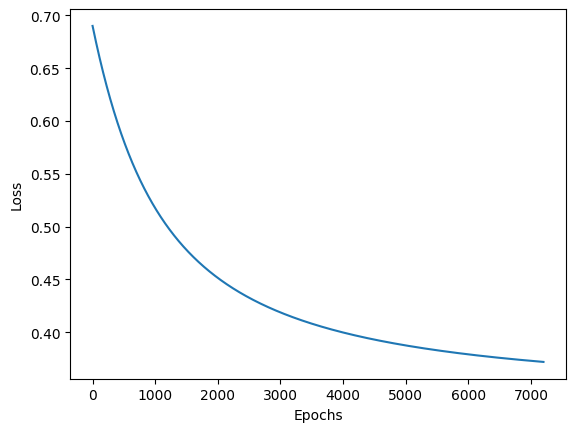

In [41]:
for epochs in range(4000):
  total_loss=0
  for j in range(len(purchase)):
    x[0] = 1
    x[1] = gender[j]
    x[2] = age[j]
    x[3] = sal[j]
    y = purchase[j]
    h = 1/(1+np.exp(-sum(w[i]*x[i] for i in range(4))))
    error = y-h
    for i in range(4):
      w[i]+=alpha*error*x[i]*(2/len(purchase))
    total_loss += -y * np.log(h + 1e-8) - (1 - y) * np.log(1 - h + 1e-8)
  avg_loss = total_loss / len(purchase)
  losses.append(avg_loss)

plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [39]:
w

[np.float64(-0.2444407362043959),
 np.float64(-0.13058695054321504),
 np.float64(0.5391149825237246),
 np.float64(0.29192783601693145)]

In [45]:
correct = 0
for i in range(len(purchase)):
    x_input = [1, gender[i], age[i], sal[i]]
    z = sum(w[j] * x_input[j] for j in range(4))
    h = 1 / (1 + np.exp(-z))
    pred = 1 if h >= 0.5 else 0
    if pred == purchase[i]:
        correct += 1

custom_acc = correct / len(purchase)


In [52]:
print("Custom Model Accuracy: ", custom_acc)

Custom Model Accuracy:  0.84


In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
# Load data
df = pd.read_csv("Social_Network_Ads.csv")

# Features and target
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = np.array(purchase)
y = y.flatten()
# Pipeline with scaling and linear regression
model = make_pipeline(StandardScaler(), LogisticRegression())

# Fit the model
model.fit(X, y)

# Show coefficients and intercept
coef = model.named_steps['logisticregression'].coef_
intercept = model.named_steps['logisticregression'].intercept_

# Predict on the first row
y_pred = model.predict(X)
print("Coefficients:", coef)
print("Intercept:", intercept)
sklearn_acc = accuracy_score(y, y_pred)

print("Sklearn Model Accuracy:", sklearn_acc)

Coefficients: [[0.14556209 2.29122065 1.14717672]]
Intercept: [-1.09865243]
Sklearn Model Accuracy: 0.8525
